In [50]:
# libs
import pandas as pd;
import matplotlib.pyplot as plt
import numpy as np

In [51]:
def generateData(filename):
    data = pd.read_csv(filename);
    dataDict = {};

    for row in data.iterrows():
        countryName = row[1][0];
        year = row[1][2];
        countryGDP = row[1][3];
        if year == 2014:
            dataDict[countryName] = countryGDP;
    return dataDict;

In [52]:
"""
takes two dictionaries and stich them together 
"""

def stitch(dictA, dictB):
    namesA = set(dictA);
    namesB = set(dictB);
    names = namesA.intersection(namesB);
    points = [];
    point = {}
    for name in names:
        point = (dictA[name], dictB[name]);
        points.append(point);
    return points;

In [53]:
def plot(filenameX, xlabel, filenameY, ylabel):
    xDict = generateData(filenameX);
    yDict = generateData(filenameY);
    
    r = stitch(xDict, yDict);
    
    xList = list(map(lambda ar: ar[0], r));
    yList = list(map(lambda ar: ar[1], r));

    plt.plot(xList, yList, 'o', color='black');
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.show();

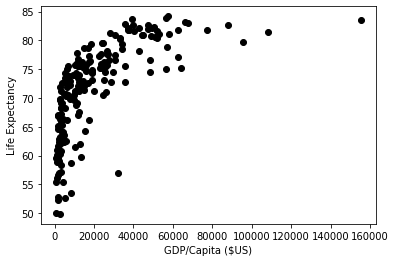

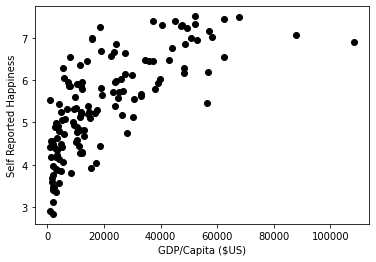

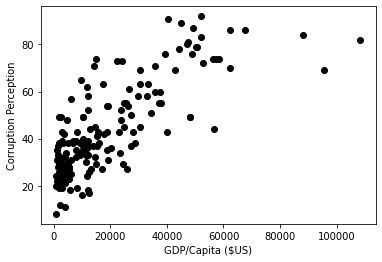

In [54]:
plot("./gdp.csv", "GDP/Capita ($US)", "./le.csv", "Life Expectancy");

plot("./gdp.csv", "GDP/Capita ($US)", "./happy.csv", "Self Reported Happiness");

plot("./gdp.csv", "GDP/Capita ($US)", "./corrupt.csv", "Corruption Perception");

In [55]:
# calculate mean and standard div
"""
GetLeSt() calcultate the mean and standard diviation
from the data set with specified parameters
"""

def getLeSt():
    import statistics
    yDict = generateData('./le.csv')
    
    r = stitch(xDict, yDict)
    
    yList = list(map(lambda ar: ar[1], r))
    
    mean = statistics.mean(yList)
    standard = statistics.stdev(yList)
    return mean, standard

#print('mean - Life expectency:', statistics.mean(yList))
#print('standard div:', statistics.stdev(yList))
#print(mean)

In [56]:
"""
This method filters out all countries that don't meet the 
requirement of getLeSt() 
"""

def filter_dict(): 
    LeDict = {}
    newDict = dict()
    LeDict = generateData('le.csv')

    meanVal, standardVal = getLeSt()
    meanstandard = meanVal + standardVal

    for (key, value) in LeDict.items():
        if value >= meanstandard:
            newDict[key] = value
    return newDict

In [57]:
"""
sort_dict() takes in a dictionary and sorts it
"""

def sort_dict():
    newDict = filter_dict()
    import operator
    sorted_list = sorted(newDict.items(), key=operator.itemgetter(1))
    print(sorted_list)
    print('hello')

In [14]:
dictNew1 = generateData('le.csv')
dictNew2 = generateData('gdp.csv')

r = stitch(dictNew1, dictNew2)

xList = list(map(lambda ar: ar[1], r));
yList = list(map(lambda ar: ar[1], r));

for i in r:
    pass